Dataset Shape: (8807, 12)


C:\Users\hp\AppData\Local\Temp\ipykernel_17148\4266459855.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


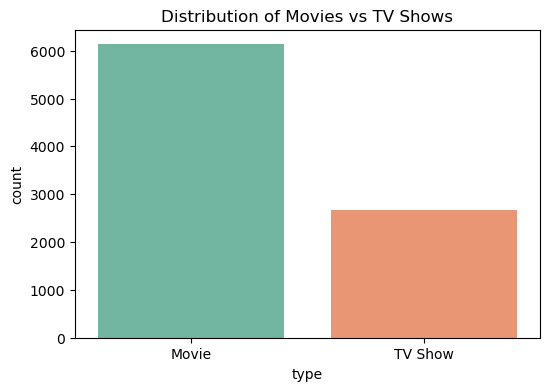

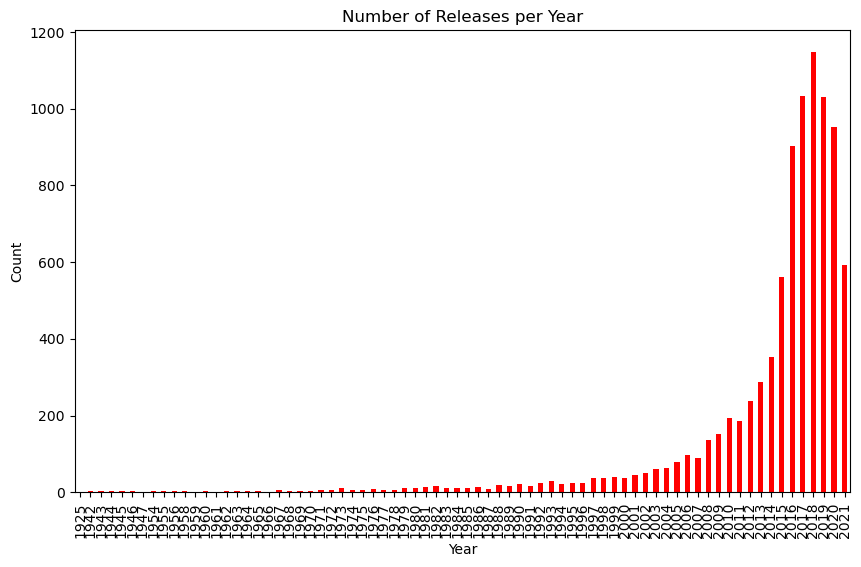

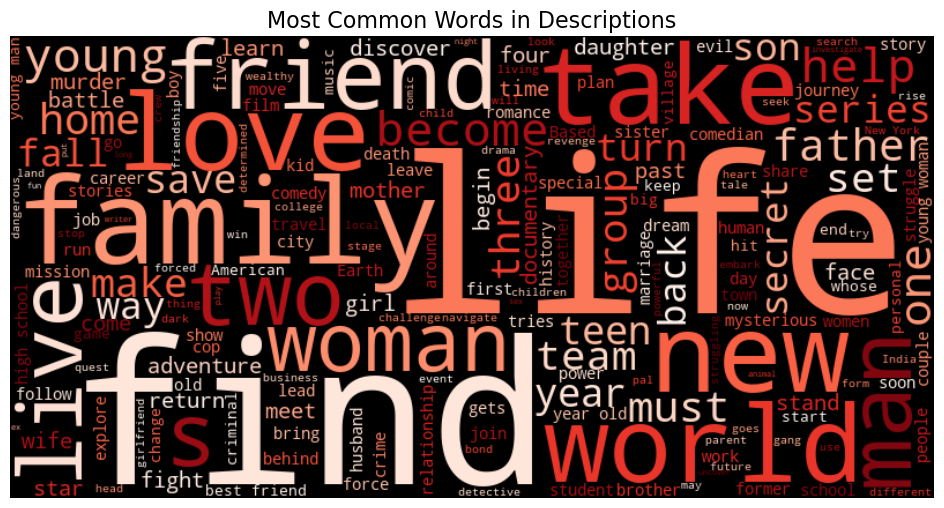


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1214
           1       0.77      0.28      0.41       548

    accuracy                           0.75      1762
   macro avg       0.76      0.62      0.63      1762
weighted avg       0.76      0.75      0.71      1762



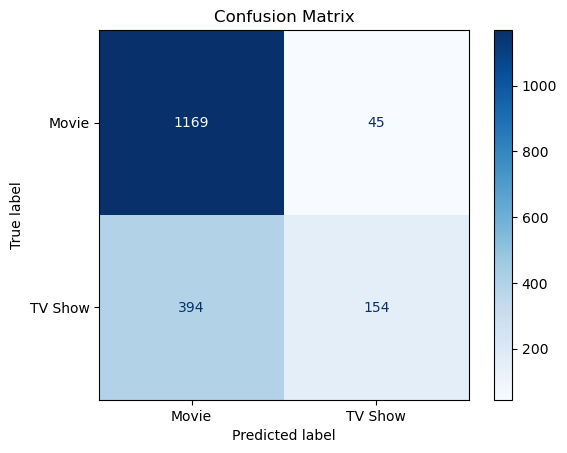

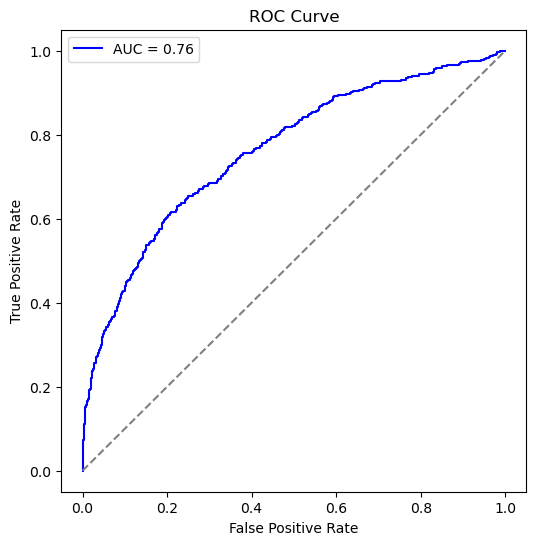

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from wordcloud import WordCloud

# ==========================
# 1. Load Dataset
# ==========================
df = pd.read_csv("netflix_titles.csv")
print("Dataset Shape:", df.shape)

# ==========================
# 2. Basic EDA
# ==========================
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Distribution of Movies vs TV Shows")
plt.show()

plt.figure(figsize=(10,6))
df['release_year'].value_counts().sort_index().plot(kind="bar", color="red")
plt.title("Number of Releases per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# WordCloud for movie descriptions
text = " ".join(str(desc) for desc in df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Descriptions", fontsize=16)
plt.show()

# ==========================
# 3. Data Preprocessing
# ==========================
# Target variable: Movie = 0, TV Show = 1
df["label"] = df["type"].apply(lambda x: 1 if x == "TV Show" else 0)

# Use 'description' as feature
X = df["description"].fillna("")
y = df["label"]

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# ==========================
# 4. Build Model
# ==========================
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# ==========================
# 5. Model Evaluation
# ==========================
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Movie", "TV Show"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from wordcloud import WordCloud

# ==========================
# 1. Load Dataset
# ==========================
df = pd.read_csv("netflix_titles.csv")


# ==========================
# 3. Data Preprocessing
# ==========================
# Target variable: Movie = 0, TV Show = 1
df["label"] = df["type"].apply(lambda x: 1 if x == "TV Show" else 0)

# Use 'description' as feature
X = df["description"].fillna("")
y = df["label"]

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# ==========================
# 4. Build Model
# ==========================
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]



# ==========================
# 6. Prediction Function
# ==========================
def predict_content_type(description, vectorizer, model):
    """
    Predict whether a description belongs to a Movie or TV Show.
    
    Args:
        description (str): The description of the content.
        vectorizer (TfidfVectorizer): The trained TF-IDF vectorizer.
        model (LogisticRegression): The trained logistic regression model.
    
    Returns:
        tuple: Predicted class (Movie or TV Show) and probability of being a TV Show.
    """
    # Transform the input description using the same TF-IDF vectorizer
    desc_tfidf = vectorizer.transform([description])
    
    # Predict the class
    prediction = model.predict(desc_tfidf)[0]
    predicted_class = "TV Show" if prediction == 1 else "Movie"
    
    # Get probability for TV Show (class 1)
    probability = model.predict_proba(desc_tfidf)[0][1]
    
    return predicted_class, probability

# Example usage of prediction
sample_description = "Dramas, International Movies, Music & Musicals"
predicted_class, probability = predict_content_type(sample_description, vectorizer, model)
print(f"\nPrediction for sample description:")
print(f"Description: {sample_description}")
print(f"Predicted Class: {predicted_class}")
print(f"Probability of being a TV Show: {probability:.2f}")


Prediction for sample description:
Description: Dramas, International Movies, Music & Musicals
Predicted Class: Movie
Probability of being a TV Show: 0.25
